In [1]:
import numpy as np
import pandas as pd
import difflib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os



In [2]:
display (os.getcwd())

'C:\\Users\\HP'

In [3]:
os.chdir('C:\project\Movie Recommendation System')

In [4]:
movies =pd.read_csv('movies.csv')
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
display (movies.shape)

(4803, 24)

In [6]:
movies = movies[['id','title','overview','genres','keywords','cast','crew']]

movies

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa..."
...,...,...,...,...,...,...,...
4798,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,Action Crime Thriller,united states\u2013mexico barrier legs arms pa...,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de..."
4799,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,Comedy Romance,NaN,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart..."
4800,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",Comedy Drama Romance TV Movie,date love at first sight narration investigati...,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar..."
4801,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,NaN,NaN,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm..."


In [7]:
display (movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4803 non-null   int64 
 1   title     4803 non-null   object
 2   overview  4800 non-null   object
 3   genres    4775 non-null   object
 4   keywords  4391 non-null   object
 5   cast      4760 non-null   object
 6   crew      4803 non-null   object
dtypes: int64(1), object(6)
memory usage: 262.8+ KB


None

In [8]:
display (movies.isna().sum())

id            0
title         0
overview      3
genres       28
keywords    412
cast         43
crew          0
dtype: int64

In [9]:
display (movies.head())


,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa..."


In [10]:
display (movies.isna().sum())


id            0
title         0
overview      3
genres       28
keywords    412
cast         43
crew          0
dtype: int64

In [11]:
for feature in movies:
  movies= movies.fillna('')
display (movies.head())


,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa..."


In [12]:
print(movies.isna().sum()) 

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64


In [13]:
movies.duplicated().sum()

0

In [14]:
movies.iloc[0].genres

'Action Adventure Fantasy Science Fiction'

In [15]:
movies['crew'][0]

'[{\'name\': \'Stephen E. Rivkin\', \'gender\': 0, \'department\': \'Editing\', \'job\': \'Editor\', \'credit_id\': \'52fe48009251416c750aca23\', \'id\': 1721}, {\'name\': \'Rick Carter\', \'gender\': 2, \'department\': \'Art\', \'job\': \'Production Design\', \'credit_id\': \'539c47ecc3a36810e3001f87\', \'id\': 496}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Sound Designer\', \'credit_id\': \'54491c89c3a3680fb4001cf7\', \'id\': 900}, {\'name\': \'Christopher Boyes\', \'gender\': 0, \'department\': \'Sound\', \'job\': \'Supervising Sound Editor\', \'credit_id\': \'54491cb70e0a267480001bd0\', \'id\': 900}, {\'name\': \'Mali Finn\', \'gender\': 1, \'department\': \'Production\', \'job\': \'Casting\', \'credit_id\': \'539c4a4cc3a36810c9002101\', \'id\': 1262}, {\'name\': \'James Horner\', \'gender\': 2, \'department\': \'Sound\', \'job\': \'Original Music Composer\', \'credit_id\': \'5544ee3b925141499f0008fc\', \'id\': 1729}, {\'name\': \'James

In [16]:
import ast

In [17]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
    return L

In [18]:
movies['crew']=movies['crew'].apply(fetch_director)

In [19]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,[Andrew Stanton]


In [20]:
#gpt
movies['overview'] = movies['overview'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies['genres'] = movies['genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies['keywords'] = movies['keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies['cast'] = movies['cast'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
movies['crew'] = movies['crew'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [21]:
movies.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [22]:
movies['tags'] = movies['overview'] + ' ' + movies['genres'] + ' ' + movies['keywords'] + ' ' + movies['cast'] + ' ' + movies['crew']

In [23]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,Action Adventure Crime,spy based on novel secret agent sequel mi6,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca...",Action Adventure Science Fiction,based on novel mars medallion space travel pri...,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,"John Carter is a war-weary, former military ca..."


In [24]:
new_df=movies[['id','title','tags']]

In [25]:
new_df

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4798,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4799,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4800,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [26]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy Science Fiction culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [27]:
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\HP\AppData\Local\Temp\ipykernel_17452\4224080999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [28]:
new_df.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [29]:
import nltk

In [30]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [31]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [32]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\HP\AppData\Local\Temp\ipykernel_17452\3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [34]:
vectors=cv.fit_transform(new_df['tags']).toarray()

In [35]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
#cv.get_feature_names()

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
similarity=cosine_similarity(vectors)

In [39]:
similarity[0]

array([1.        , 0.07325794, 0.07412493, ..., 0.02067246, 0.04441156,
       0.        ])

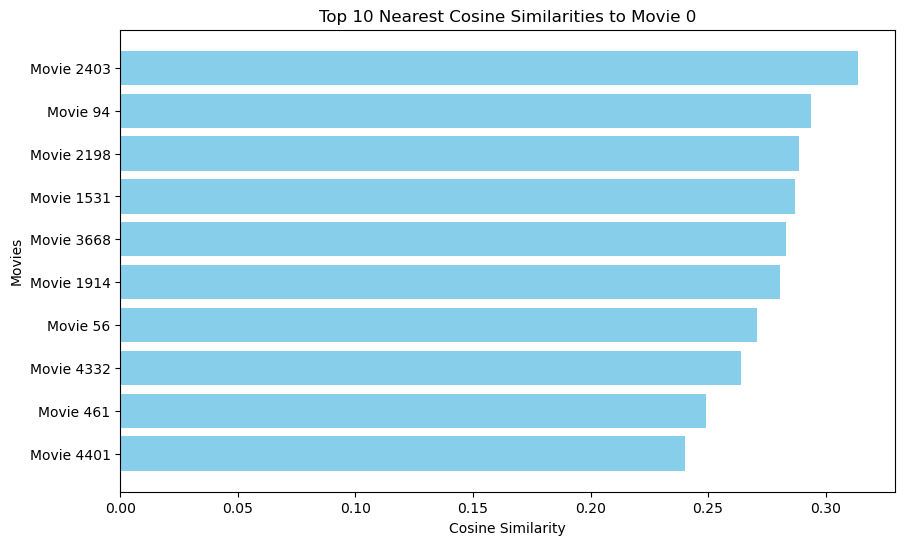

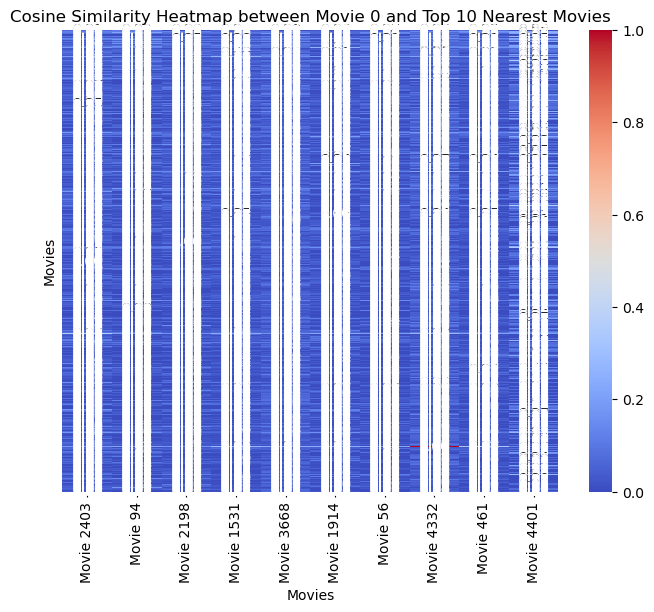

In [40]:
index1=0
top_10_indices = similarity.argsort()[0][-11:-1][::-1]
top_10_similarity = [similarity[0][i] for i in top_10_indices]
top_10_movies = [f'Movie {i}' for i in top_10_indices]

# Visualize top 10 nearest similarities as a bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_10_movies, top_10_similarity, color='skyblue')
plt.xlabel('Cosine Similarity')
plt.ylabel('Movies')
plt.title(f'Top 10 Nearest Cosine Similarities to Movie {index1}')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest similarity on top
plt.show()

# Visualize cosine similarity as a heatmap for the selected vectors
plt.figure(figsize=(8, 6))
sns.heatmap(similarity[:, top_10_indices], cmap='coolwarm', annot=True, fmt=".2f", xticklabels=top_10_movies, yticklabels=False)
plt.title(f'Cosine Similarity Heatmap between Movie {index1} and Top 10 Nearest Movies')
plt.xlabel('Movies')
plt.ylabel('Movies')
plt.show()

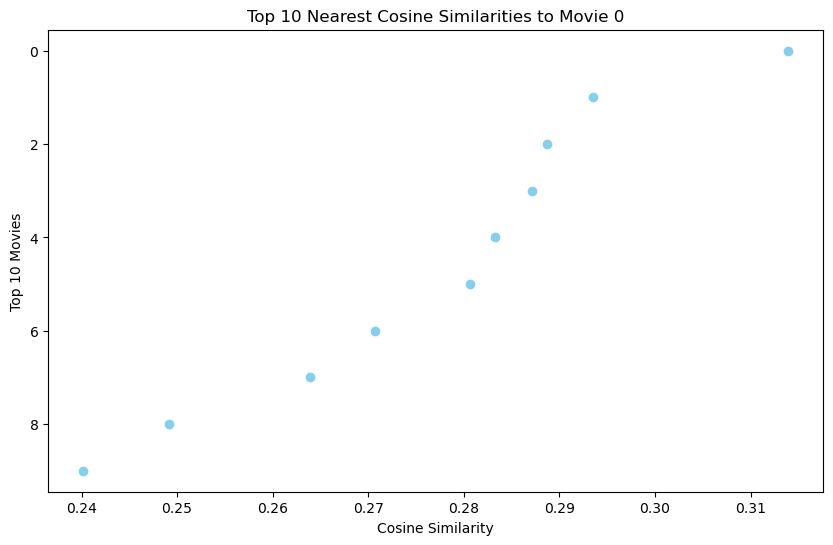

In [42]:
import matplotlib.pyplot as plt

# Define the indices of the vectors you want to compare
index1 = 0  # Index of the first vector

# Get the top 10 nearest similarities
top_10_indices = similarity.argsort()[0][-11:-1][::-1]
top_10_similarity = [similarity[0][i] for i in top_10_indices]
top_10_movies = [f'Movie {i}' for i in top_10_indices]

# Visualize top 10 nearest similarities as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(top_10_similarity, range(10), color='skyblue')
plt.xlabel('Cosine Similarity')
plt.ylabel('Top 10 Movies')
plt.title(f'Top 10 Nearest Cosine Similarities to Movie {index1}')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest similarity at the top
plt.show()


In [43]:
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances=similarity[movie_index]
    movies_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [45]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Batman
Amidst the Devil's Wings
Batman Returns


In [ ]:
import pickle

In [ ]:
pickle.dump(new_df,open('movies.pkl','wb'))

In [ ]:
new_df['title'].values

In [ ]:
pickle.dump(new_df.to_dict(),open('movie_dict.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))